In [1]:
# imports
import os as osOS
import datetime as dtDatetime
import random as rdRandom
import math as mtMath
import pandas as pdPandas
import numpy as npNumpy
import matplotlib.pyplot as mpPlot
from pathlib import Path as pPath
from tqdm import tqdm as tqdmProgress
# settings
pdPandas.options.display.max_columns = None
pdPandas.options.display.max_colwidth = None
pdPandas.options.display.max_rows = None

In [2]:
# run
df_w_0 = pdPandas.read_csv(pPath(f'{osOS.getcwd()}\\data\\procurement.csv'))
df_w_0.index = range(1, df_w_0.shape[0]+1)

In [3]:
# help
def createDate(value):
    return f'{value[6:10]}{value[3:5]}{value[0:2]}'
def createDayOfWeek(value):
    return dtDatetime.datetime.strptime(value, '%Y%m%d').strftime('%A')
def createIsWeekend(value):
    return 'Yes' if value in ['Friday','Saturday'] else 'No'
def createIsEvent(value):
    return 'Yes' if value in ['20201201','20201202','20201203','20201225','20201226','20201227','20201228','20201229','20201230','20201231','20210101'] else 'No'
def createSupplierId(row):
    rnd_1 = round(100*(abs(mtMath.sin(rdRandom.uniform(0,180))+mtMath.cos(rdRandom.uniform(0,180))))/2)
    rnd_2 = round(100*(mtMath.cos(rdRandom.uniform(0,180))))
    rnd_3 = round(66*(mtMath.cos(rdRandom.uniform(0,180))))
    rnd_4 = round(33*(mtMath.cos(rdRandom.uniform(0,180))))
    return 'S'+f'000{round(abs(rnd_1+rnd_2+rnd_3+rnd_4)/3)+1}'.rjust(6,'0')
# init
df_w_1 = df_w_0.copy()
# run
df_w_1['Date'] = df_w_1['PurchaseDate'].apply(createDate)
df_w_1.insert(0, 'Date', df_w_1.pop('Date'))
df_w_1['Day Of Week'] = df_w_1['Date'].apply(createDayOfWeek)
df_w_1.insert(1, 'Day Of Week', df_w_1.pop('Day Of Week'))
df_w_1['Is Weekend'] = df_w_1['Day Of Week'].apply(createIsWeekend)
df_w_1.insert(2, 'Is Weekend', df_w_1.pop('Is Weekend'))
df_w_1['Is Event'] = df_w_1['Date'].apply(createIsEvent)
df_w_1.insert(3, 'Is Event', df_w_1.pop('Is Event'))
df_w_1['Supplier Id'] = df_w_1.apply(createSupplierId, axis=1)
df_w_1.insert(4, 'Supplier Id', df_w_1.pop('Supplier Id'))
df_w_1 = df_w_1.drop(columns=['PurchaseDate','PurchaseWeekday','Weekend Flag','Event Flag','Temperature'])
df_w_1.index = range(1, df_w_1.shape[0]+1)

<Axes: xlabel='Date'>

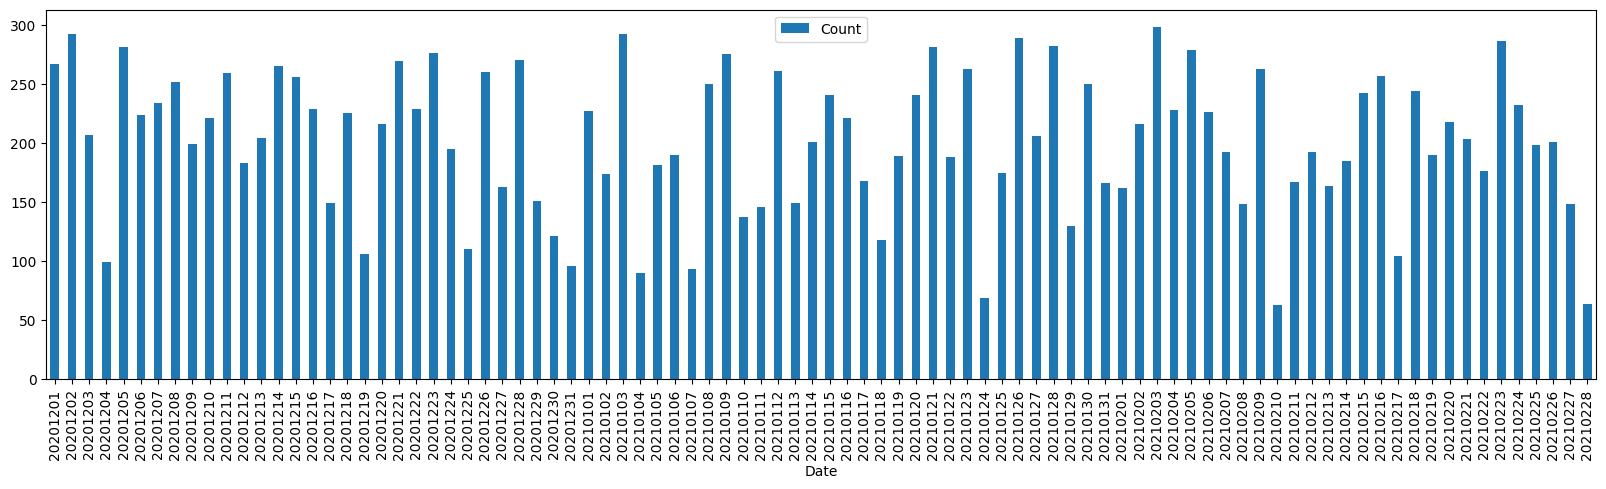

In [4]:
# help
def createRandom():
    rnd_1 = round(rdRandom.uniform(0,100))
    rnd_2 = round(100*(abs(mtMath.sin(rdRandom.uniform(0,180))+mtMath.cos(rdRandom.uniform(0,180))))/2)
    rnd_3 = round(66*(mtMath.cos(rdRandom.uniform(0,180))))
    rnd_4 = round(33*(mtMath.cos(rdRandom.uniform(0,180))))
    return abs(rnd_1+rnd_2+rnd_3+rnd_4)
# init
df_w_2 = pdPandas.DataFrame(columns=[])
# run
for i in df_w_1['Date'].unique():
    df_w_i = df_w_1[df_w_1['Date']==i]
    df_w_i.index = range(1, df_w_i.shape[0]+1)
    rnd = createRandom()
    for j in range(1, rnd):
        if j in df_w_i.index:
            df_w_i = df_w_i.drop(j)
    df_w_2 = pdPandas.concat([df_w_2, df_w_i], ignore_index=True)
df_w_2.index = range(1, df_w_2.shape[0]+1)
# check
df_w_p = df_w_2[['Date','Day Of Week']].groupby(['Date','Day Of Week']).size().reset_index(name='Count').sort_values(by=['Date'])
df_w_p = df_w_p[['Date','Count']]
df_w_p.index = df_w_p['Date']
df_w_p.plot(kind='bar', figsize=(20, mpPlot.rcParams['figure.figsize'][1]))

In [5]:
# help
countries = {1:'United Arab Emirates',2:'Saudi Arabia',3:'Qatar',4:'Kuwait',5:'Turkey',6:'Lebanon'}
# init
df_w_3 = df_w_2.copy()
df_w_supplier = pdPandas.DataFrame(columns=['Supplier Id','Supplier Country','Supplier Years','Supplier Price Index','Supplier Discount'])
# run
for supplier in df_w_2['Supplier Id'].unique():
    country = countries.get(rdRandom.choices(range(1,7), weights=[20,7,4,3,10,2])[0])
    years = rdRandom.choices(range(1,21), weights=[0,0,0,2,3,6,6,7,7,8,8,9,8,9,7,5,4,3,2,1])[0]
    priceindex = 100+round(rdRandom.uniform(-20,40))
    discount = abs(round(rdRandom.uniform(0,5))+round(rdRandom.uniform(-3,3)))
    df_w_supplier_i = pdPandas.DataFrame({'Supplier Id':[supplier],'Supplier Country':[country],'Supplier Years':[years],'Supplier Price Index':[priceindex],'Supplier Discount':[discount]})
    df_w_supplier = pdPandas.concat([df_w_supplier, df_w_supplier_i], ignore_index=True)
df_w_3 = pdPandas.merge(df_w_3, df_w_supplier.add_prefix('S '), left_on=['Supplier Id'], right_on=['S Supplier Id'], how='left')
df_w_3 = df_w_3.drop(columns=['S Supplier Id'])
df_w_3 = df_w_3.rename(columns={'S Supplier Country':'Supplier Country','S Supplier Years':'Supplier Years','S Supplier Price Index':'Supplier Price Index','S Supplier Discount':'Supplier Discount'})
df_w_3.insert(5, 'Supplier Country', df_w_3.pop('Supplier Country'))
df_w_3.insert(6, 'Supplier Years', df_w_3.pop('Supplier Years'))
df_w_3.insert(7, 'Supplier Price Index', df_w_3.pop('Supplier Price Index'))
df_w_3.insert(8, 'Supplier Discount', df_w_3.pop('Supplier Discount'))
df_w_3 = df_w_3.drop(columns=['Supplier ID','Vendor Location','Vendor Num Years','Vendor Price Index','Vendor Standard Discount','Competitor Vendor Exist'])
df_w_3.index = range(1, df_w_3.shape[0]+1)

In [6]:
# help
itemcategories = {1:'Fashion',2:'Beauty',3:'Marketing',4:'Electronics',5:'Information Technology',6:'Financial Services',7:'Facility',8:'Entertainment',9:'Supermarket'}
ordercategories = {1:'Product',2:'Service'}
orderurgencies = {1:'High',2:'Medium',3:'Low'}
orderdeliverystatuses = {1:'On-Time',2:'Late',3:'Rejected'}
def createItemCategory(row):
    return itemcategories.get(rdRandom.choices(range(1,10), weights=[11,9,7,7,5,5,3,2,1])[0])
def createItemQuantity(row):
    rnd_1 = round(20*(abs(mtMath.sin(rdRandom.uniform(0,180))+mtMath.cos(rdRandom.uniform(0,180))))/2)
    rnd_2 = round(10*(mtMath.cos(rdRandom.uniform(0,180))))
    return abs(rnd_1+rnd_2)
def createItemUnitPrice(row):
    rnd_1 = round(100000*(abs(mtMath.sin(rdRandom.uniform(0,180))+mtMath.cos(rdRandom.uniform(0,180))))/2)
    rnd_2 = round(66666*(mtMath.cos(rdRandom.uniform(0,180))))
    return round(abs(rnd_1+rnd_2)/100,1)
def createItemTotalPrice(row):
    return round(row['Item Quantity']*row['Item Unit Price'],1)
def createOrderCategory(row):
    return ordercategories.get(rdRandom.choices(range(1,3), weights=[3,1])[0])
def createOrderUrgency(row):
    return orderurgencies.get(rdRandom.choices(range(1,4), weights=[1,3,1])[0])
def createOrderDeliveryStatus(row):
    return orderdeliverystatuses.get(rdRandom.choices(range(1,4), weights=[6,5,1])[0])
# init
df_w_4 = df_w_3.copy()
# run
df_w_4['Item Category'] = df_w_4.apply(createItemCategory, axis=1)
df_w_4.insert(9, 'Item Category', df_w_4.pop('Item Category'))
df_w_4['Item Quantity'] = df_w_4.apply(createItemQuantity, axis=1)
df_w_4.insert(10, 'Item Quantity', df_w_4.pop('Item Quantity'))
df_w_4['Item Unit Price'] = df_w_4.apply(createItemUnitPrice, axis=1)
df_w_4.insert(11, 'Item Unit Price', df_w_4.pop('Item Unit Price'))
df_w_4['Item Total Price'] = df_w_4.apply(createItemTotalPrice, axis=1)
df_w_4.insert(12, 'Item Total Price', df_w_4.pop('Item Total Price'))
df_w_4['Order Category'] = df_w_4.apply(createOrderCategory, axis=1)
df_w_4.insert(13, 'Order Category', df_w_4.pop('Order Category'))
df_w_4['Order Urgency'] = df_w_4.apply(createOrderUrgency, axis=1)
df_w_4.insert(14, 'Order Urgency', df_w_4.pop('Order Urgency'))
df_w_4['Order Delivery Status'] = df_w_4.apply(createOrderDeliveryStatus, axis=1)
df_w_4.insert(15, 'Order Delivery Status', df_w_4.pop('Order Delivery Status'))
df_w_4 = df_w_4.drop(columns=['Quantity Ordered','Safety Stock','Unit Price','Daily stock units all','Total Spending','Delivery Status','Stockout Events','PO urgency','Number of Procurement SRs'])
df_w_4.index = range(1, df_w_4.shape[0]+1)
# check
df_w_4.head(3)

,Date,Day Of Week,Is Weekend,Is Event,Supplier Id,Supplier Country,Supplier Years,Supplier Price Index,Supplier Discount,Item Category,Item Quantity,Item Unit Price,Item Total Price,Order Category,Order Urgency,Order Delivery Status
1,20201201,Tuesday,No,Yes,S000018,United Arab Emirates,18,119,2,Beauty,19,611.4,11616.6,Service,High,Rejected
2,20201201,Tuesday,No,Yes,S000036,Lebanon,19,100,3,Fashion,20,360.1,7202.0,Service,Medium,Late
3,20201201,Tuesday,No,Yes,S000006,United Arab Emirates,13,109,5,Electronics,8,379.2,3033.6,Product,Medium,Late


In [7]:
# help
def addInconsistency(value, ratio):
    return None if rdRandom.choices(range(0,2), weights=[100-ratio,ratio])[0]>0 else value
# init
df_w_5 = df_w_4.copy()
# run
df_w_5['Supplier Country'] = df_w_5['Supplier Country'].apply(addInconsistency, args=(5,))
df_w_5['Supplier Years'] = df_w_5['Supplier Years'].apply(addInconsistency, args=(7,))
df_w_5['Supplier Price Index'] = df_w_5['Supplier Price Index'].apply(addInconsistency, args=(13,))
df_w_5['Supplier Discount'] = df_w_5['Supplier Discount'].apply(addInconsistency, args=(13,))
df_w_5['Item Category'] = df_w_5['Item Category'].apply(addInconsistency, args=(3,))
df_w_5['Item Quantity'] = df_w_5['Item Quantity'].apply(addInconsistency, args=(5,))
df_w_5['Item Unit Price'] = df_w_5['Item Unit Price'].apply(addInconsistency, args=(7,))
df_w_5['Item Total Price'] = df_w_5['Item Total Price'].apply(addInconsistency, args=(13,))
df_w_5['Order Category'] = df_w_5['Order Category'].apply(addInconsistency, args=(5,))
df_w_5['Order Urgency'] = df_w_5['Order Urgency'].apply(addInconsistency, args=(7,))
df_w_5['Order Delivery Status'] = df_w_5['Order Delivery Status'].apply(addInconsistency, args=(13,))
df_w_5.index = range(1, df_w_5.shape[0]+1)

In [8]:
# check
df_w_5.head(10)

,Date,Day Of Week,Is Weekend,Is Event,Supplier Id,Supplier Country,Supplier Years,Supplier Price Index,Supplier Discount,Item Category,Item Quantity,Item Unit Price,Item Total Price,Order Category,Order Urgency,Order Delivery Status
1,20201201,Tuesday,No,Yes,S000018,United Arab Emirates,18.0,NaN,2.0,Beauty,19.0,611.4,11616.6,Service,High,Rejected
2,20201201,Tuesday,No,Yes,S000036,Lebanon,19.0,100.0,3.0,Fashion,20.0,360.1,7202.0,Service,Medium,Late
3,20201201,Tuesday,No,Yes,S000006,None,13.0,109.0,5.0,Electronics,8.0,379.2,3033.6,Product,Medium,Late
4,20201201,Tuesday,No,Yes,S000029,United Arab Emirates,8.0,91.0,NaN,Entertainment,16.0,68.4,1094.4,Product,None,None
5,20201201,Tuesday,No,Yes,S000053,United Arab Emirates,13.0,100.0,0.0,Information Technology,9.0,890.9,8018.1,None,Low,Late
6,20201201,Tuesday,No,Yes,S000019,United Arab Emirates,16.0,NaN,2.0,Financial Services,3.0,256.3,768.9,Product,Medium,On-Time
7,20201201,Tuesday,No,Yes,S000025,Kuwait,8.0,115.0,1.0,Fashion,7.0,683.9,4787.3,Product,Medium,On-Time
8,20201201,Tuesday,No,Yes,S000032,Turkey,14.0,113.0,8.0,Facility,10.0,240.7,NaN,Product,High,Late
9,20201201,Tuesday,No,Yes,S000036,None,NaN,100.0,3.0,Information Technology,1.0,1462.5,1462.5,Product,Low,Late
10,20201201,Tuesday,No,Yes,S000038,Turkey,15.0,139.0,NaN,Electronics,5.0,1144.6,5723.0,Service,Medium,Late


In [9]:
# check
df_w_nulls = pdPandas.DataFrame(round(100*(df_w_5.isna().sum() / df_w_5.shape[0]),1))
df_w_nulls.columns=['NULLs']
df_w_nulls

,NULLs
Date,0.0
Day Of Week,0.0
Is Weekend,0.0
Is Event,0.0
Supplier Id,0.0
Supplier Country,4.8
Supplier Years,6.8
Supplier Price Index,12.7
Supplier Discount,13.0
Item Category,3.1


In [10]:
# run
df_w_5.to_csv(pPath(f'{osOS.getcwd()}\\data\\w_procurement.csv'))